In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_score, ShuffleSplit
from sklearn.model_selection import train_test_split, RepeatedStratifiedKFold, RepeatedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.feature_selection import VarianceThreshold
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

In [10]:
def plot_decision(clf, X, y):
    
    x1, x2 = X.T
    xmin, xmax = x1.min()-.1, x1.max()+.1
    ymin, ymax = x2.min()-.1, x2.max()+.1
    
    XX, YY = np.meshgrid(np.linspace(xmin, xmax, 200), np.linspace(ymin, ymax, 200))
    Z = clf.predict(np.c_[XX.ravel(), YY.ravel()]).reshape(XX.shape)
    
    plt.contourf(XX, YY, Z, alpha=.3, cmap=plt.cm.RdBu)
    plt.plot(X[y==0, 0], X[y==0, 1], 'b^', alpha=.7)
    plt.plot(X[y==1, 0], X[y==1, 1], 'ro', alpha=.7)

In [220]:
predictors = pd.read_csv('datasets/twoClassData/predictors.csv', index_col=0)
targets = pd.read_csv('datasets/twoClassData/classes.csv', index_col=0)
targets.columns = ['Class']
targets.index = predictors.index

In [221]:
predictors.head()

,PredictorA,PredictorB
1,0.1582,0.1609
2,0.6552,0.4918
3,0.7060,0.6333
4,0.1992,0.0881
5,0.3952,0.4152


In [224]:
np.argmin(svc_grid.cv_results_['rank_test_score'])

8

In [30]:
predictors.shape, targets.shape

((208, 2), (208, 1))

In [9]:
targets.Class.value_counts()

Class1    111
Class2     97
Name: Class, dtype: int64

In [7]:
cls1 = targets.Class=='Class1'
cls2 = targets.Class=='Class2'

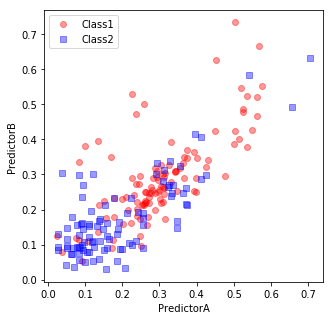

In [8]:
plt.figure(figsize=(5, 5))
plt.plot(predictors.loc[cls1, "PredictorA"], predictors.loc[cls1, "PredictorB"], 
         'ro', alpha=.4, label='Class1')
plt.plot(predictors.loc[cls2, "PredictorA"], predictors.loc[cls2, "PredictorB"], 
         'bs', alpha=.4, label='Class2')
plt.xlabel(predictors.PredictorA.name)
plt.ylabel(predictors.PredictorB.name)
plt.legend()

In [37]:
knn_params = {'n_neighbors': list(range(1, 10, 2))}

In [46]:
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5)

In [59]:
X = predictors.values
y, idx = targets.Class.factorize()

In [61]:
idx

Index(['Class2', 'Class1'], dtype='object')

In [62]:
knn_grid.fit(X, y)

GridSearchCV(cv=5, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_neighbors': [1, 3, 5, 7, 9]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [63]:
knn_grid.best_params_, knn_grid.best_score_

({'n_neighbors': 7}, 0.7451923076923077)

In [113]:
best_knn = knn_grid.best_estimator_

Text(0.5,1,'7-KNN')

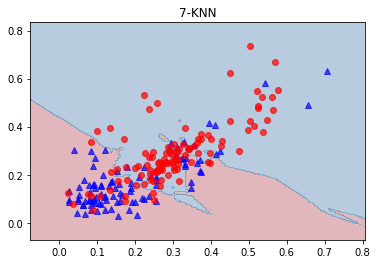

In [119]:
plot_decision(best_knn, X, y)
plt.title("7-KNN")

Text(0.5,1,'1-KNN')

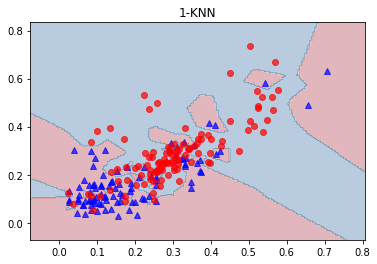

In [118]:
k1 = KNeighborsClassifier(n_neighbors=1).fit(X, y)

plot_decision(k1, X, y)
plt.title('1-KNN')

### Case Study: Credit Scoring

In [11]:
credit = pd.read_csv('data/GermanCredit/GermanCredit.csv', index_col=0)

In [12]:
credit.columns = credit.columns.str.replace('.', '_')

In [13]:
credit.head()

,Duration,Amount,InstallmentRatePercentage,ResidenceDuration,Age,NumberExistingCredits,NumberPeopleMaintenance,Telephone,ForeignWorker,Class,...,OtherInstallmentPlans_Bank,OtherInstallmentPlans_Stores,OtherInstallmentPlans_None,Housing_Rent,Housing_Own,Housing_ForFree,Job_UnemployedUnskilled,Job_UnskilledResident,Job_SkilledEmployee,Job_Management_SelfEmp_HighlyQualified
1,6,1169,4,4,67,2,1,0.0,1.0,Good,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,48,5951,2,2,22,1,1,1.0,1.0,Bad,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
3,12,2096,2,3,49,1,2,1.0,1.0,Good,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,42,7882,2,4,45,1,2,1.0,1.0,Good,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
5,24,4870,3,4,53,2,2,1.0,1.0,Bad,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [14]:
credit.shape

(1000, 62)

In [15]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 1 to 1000
Data columns (total 62 columns):
Duration                                  1000 non-null int64
Amount                                    1000 non-null int64
InstallmentRatePercentage                 1000 non-null int64
ResidenceDuration                         1000 non-null int64
Age                                       1000 non-null int64
NumberExistingCredits                     1000 non-null int64
NumberPeopleMaintenance                   1000 non-null int64
Telephone                                 1000 non-null float64
ForeignWorker                             1000 non-null float64
Class                                     1000 non-null object
CheckingAccountStatus_lt_0                1000 non-null float64
CheckingAccountStatus_0_to_200            1000 non-null float64
CheckingAccountStatus_gt_200              1000 non-null float64
CheckingAccountStatus_none                1000 non-null float64
CreditHistor

In [18]:
df_nunique = pd.DataFrame({'cardinality': credit.nunique(), 'dtype': credit.dtypes})

,cardinality,dtype
Duration,33,int64
Amount,921,int64
InstallmentRatePercentage,4,int64
ResidenceDuration,4,int64
Age,53,int64
NumberExistingCredits,4,int64
NumberPeopleMaintenance,2,int64
Telephone,2,float64
ForeignWorker,2,float64
Class,2,object


In [19]:
credit.Class.value_counts()

Good    700
Bad     300
Name: Class, dtype: int64

In [22]:
predictors = credit.drop('Class', axis=1)
target = credit.Class

predictors.shape, target.shape

((1000, 61), (1000,))

In [23]:
var = VarianceThreshold()

In [25]:
predictors_var = var.fit_transform(predictors)
predictors_var.shape

(1000, 59)

In [27]:
predictors.columns[~var.get_support()]

Index(['Purpose_Vacation', 'Personal_Female_Single'], dtype='object')

In [28]:
dummy_cols = credit.columns[credit.columns.str.contains('_')]
dummy_cols

Index(['CheckingAccountStatus_lt_0', 'CheckingAccountStatus_0_to_200',
       'CheckingAccountStatus_gt_200', 'CheckingAccountStatus_none',
       'CreditHistory_NoCredit_AllPaid', 'CreditHistory_ThisBank_AllPaid',
       'CreditHistory_PaidDuly', 'CreditHistory_Delay',
       'CreditHistory_Critical', 'Purpose_NewCar', 'Purpose_UsedCar',
       'Purpose_Furniture_Equipment', 'Purpose_Radio_Television',
       'Purpose_DomesticAppliance', 'Purpose_Repairs', 'Purpose_Education',
       'Purpose_Vacation', 'Purpose_Retraining', 'Purpose_Business',
       'Purpose_Other', 'SavingsAccountBonds_lt_100',
       'SavingsAccountBonds_100_to_500', 'SavingsAccountBonds_500_to_1000',
       'SavingsAccountBonds_gt_1000', 'SavingsAccountBonds_Unknown',
       'EmploymentDuration_lt_1', 'EmploymentDuration_1_to_4',
       'EmploymentDuration_4_to_7', 'EmploymentDuration_gt_7',
       'EmploymentDuration_Unemployed', 'Personal_Male_Divorced_Seperated',
       'Personal_Female_NotSingle', 'Personal_M

In [29]:
len(dummy_cols)

52

In [30]:
len(dummy_cols) - len(set(dummy_cols.str.split('_').str.get(0)))

41

In [31]:
degen_dummy = set(dummy_cols[[credit[c].mean()==0 for c in dummy_cols]])
degen_dummy

{'Personal_Female_Single', 'Purpose_Vacation'}

In [32]:
name = ""
keep_dummy = []
for c in dummy_cols:
    a, *b = c.split('_')
    if a in {"Personal", "Purpose"} and c not in degen_dummy:
        keep_dummy.append(c)
    elif a == name:
        keep_dummy.append(c)
    else:
        name = a
keep_dummy

['CheckingAccountStatus_0_to_200',
 'CheckingAccountStatus_gt_200',
 'CheckingAccountStatus_none',
 'CreditHistory_ThisBank_AllPaid',
 'CreditHistory_PaidDuly',
 'CreditHistory_Delay',
 'CreditHistory_Critical',
 'Purpose_NewCar',
 'Purpose_UsedCar',
 'Purpose_Furniture_Equipment',
 'Purpose_Radio_Television',
 'Purpose_DomesticAppliance',
 'Purpose_Repairs',
 'Purpose_Education',
 'Purpose_Retraining',
 'Purpose_Business',
 'Purpose_Other',
 'SavingsAccountBonds_100_to_500',
 'SavingsAccountBonds_500_to_1000',
 'SavingsAccountBonds_gt_1000',
 'SavingsAccountBonds_Unknown',
 'EmploymentDuration_1_to_4',
 'EmploymentDuration_4_to_7',
 'EmploymentDuration_gt_7',
 'EmploymentDuration_Unemployed',
 'Personal_Male_Divorced_Seperated',
 'Personal_Female_NotSingle',
 'Personal_Male_Single',
 'Personal_Male_Married_Widowed',
 'OtherDebtorsGuarantors_CoApplicant',
 'OtherDebtorsGuarantors_Guarantor',
 'Property_Insurance',
 'Property_CarOther',
 'Property_Unknown',
 'OtherInstallmentPlans_Store

In [33]:
X = credit[keep_dummy].values
y = credit['Class'].values

X.shape, y.shape

((1000, 41), (1000,))

In [34]:
len(keep_dummy)

41

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1056)

In [42]:
le_target = LabelEncoder()
y_train = le_target.fit_transform(y_train)
y_test = le_target.transform(y_test)

In [197]:
svc_params = {"C": 2**np.arange(-2, 10, dtype=float)}
cv = StratifiedKFold(n_splits=10, random_state=123)
svc_grid = GridSearchCV(SVC(kernel='rbf'), svc_params, cv=cv, scoring='accuracy', verbose=1, n_jobs=-1)

In [198]:
svc_grid.fit(X_train, y_train)

Fitting 10 folds for each of 12 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:    4.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=False),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  2.50000e-01,   5.00000e-01,   1.00000e+00,   2.00000e+00,
         4.00000e+00,   8.00000e+00,   1.60000e+01,   3.20000e+01,
         6.40000e+01,   1.28000e+02,   2.56000e+02,   5.12000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [199]:
svc_grid.best_params_

{'C': 64.0}

In [200]:
svc_grid.best_score_

0.7426666666666667

In [110]:
pd.DataFrame(svc_grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.062273,0.005559,0.700000,0.700000,0.25,{'C': 0.25},9,0.697368,0.700297,0.697368,...,0.702703,0.699704,0.702703,0.699704,0.702703,0.699704,0.009199,0.000804,0.002667,0.000296
1,0.060264,0.005421,0.700000,0.700000,0.5,{'C': 0.5},9,0.697368,0.700297,0.697368,...,0.702703,0.699704,0.702703,0.699704,0.702703,0.699704,0.008402,0.000757,0.002667,0.000296
2,0.060418,0.005431,0.700000,0.700445,1,{'C': 1.0},9,0.697368,0.703264,0.697368,...,0.702703,0.699704,0.702703,0.699704,0.702703,0.699704,0.009302,0.000840,0.002667,0.001038
3,0.077894,0.009710,0.708000,0.733325,2,{'C': 2.0},8,0.684211,0.737389,0.710526,...,0.702703,0.747041,0.729730,0.736686,0.689189,0.727811,0.024999,0.005334,0.021271,0.012105
4,0.089243,0.007668,0.717333,0.784729,4,{'C': 4.0},6,0.723684,0.780415,0.723684,...,0.689189,0.794379,0.689189,0.782544,0.729730,0.789941,0.046670,0.005039,0.024452,0.011446
5,0.092133,0.005882,0.720000,0.809629,8,{'C': 8.0},4,0.684211,0.805638,0.750000,...,0.689189,0.819527,0.716216,0.807692,0.743243,0.801775,0.038367,0.001257,0.044924,0.006428
6,0.065875,0.005301,0.720000,0.835110,16,{'C': 16.0},4,0.710526,0.833828,0.736842,...,0.675676,0.840237,0.716216,0.837278,0.770270,0.834320,0.009577,0.000743,0.050326,0.005222
7,0.076308,0.005261,0.725333,0.870369,32,{'C': 32.0},3,0.710526,0.872404,0.723684,...,0.689189,0.871302,0.689189,0.872781,0.756757,0.856509,0.011372,0.000761,0.037307,0.007835
8,0.104804,0.005286,0.742667,0.896588,64,{'C': 64.0},1,0.723684,0.888724,0.736842,...,0.729730,0.897929,0.702703,0.903846,0.770270,0.892012,0.019928,0.000778,0.041224,0.006523
9,0.147330,0.008917,0.732000,0.921476,128,{'C': 128.0},2,0.710526,0.919881,0.763158,...,0.729730,0.926036,0.702703,0.927515,0.770270,0.918639,0.034812,0.007388,0.036223,0.005543


Text(0.5,0,'C')

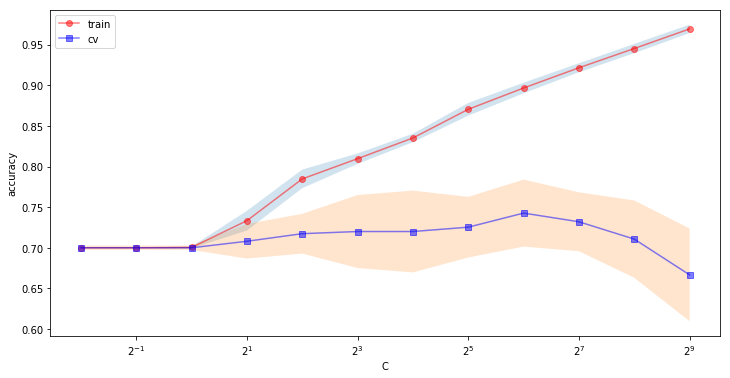

In [111]:
t1 = svc_grid.cv_results_['mean_train_score']
t2 = svc_grid.cv_results_['mean_test_score']

sd_t1 = svc_grid.cv_results_['std_train_score']
sd_t2 = svc_grid.cv_results_['std_test_score']

xs = np.array(svc_grid.cv_results_['param_C'], dtype=float)

plt.figure(figsize=(12, 6))
plt.plot(xs, t1, 'ro-', label='train', alpha=.5)
plt.plot(xs, t2, 'bs-', label='cv', alpha=.5)

plt.fill_between(xs, t1-sd_t1, t1+sd_t1, alpha=.2)
plt.fill_between(xs, t2-sd_t2, t2+sd_t2, alpha=.2)
plt.legend()
plt.semilogx(basex=2)
plt.ylabel('accuracy')
plt.xlabel('C')

In [112]:
svc_grid.score(X_test, y_test)

0.748

In [114]:
scores = cross_val_score(svc_grid.best_estimator_, X, y, cv=10)

In [115]:
scores.mean(), scores.std()

(0.75700000000000001, 0.024103941586387921)

In [120]:
shuffle_cv = ShuffleSplit(n_splits=20, test_size=.1, random_state=123)
svc_params = {"C": 2**np.arange(-2, 10, dtype=float)}

svc_grid = GridSearchCV(SVC(kernel='rbf'), svc_params, cv=shuffle_cv, scoring='accuracy', verbose=1, n_jobs=-1)

In [121]:
svc_grid.fit(X_train, y_train)

Fitting 20 folds for each of 12 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    9.1s finished


GridSearchCV(cv=ShuffleSplit(n_splits=20, random_state=123, test_size=0.1, train_size=None),
       error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([  2.50000e-01,   5.00000e-01,   1.00000e+00,   2.00000e+00,
         4.00000e+00,   8.00000e+00,   1.60000e+01,   3.20000e+01,
         6.40000e+01,   1.28000e+02,   2.56000e+02,   5.12000e+02])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [122]:
svc_grid.best_params_

{'C': 64.0}

In [123]:
svc_grid.best_score_

0.72533333333333339

(0.65, 1.0)

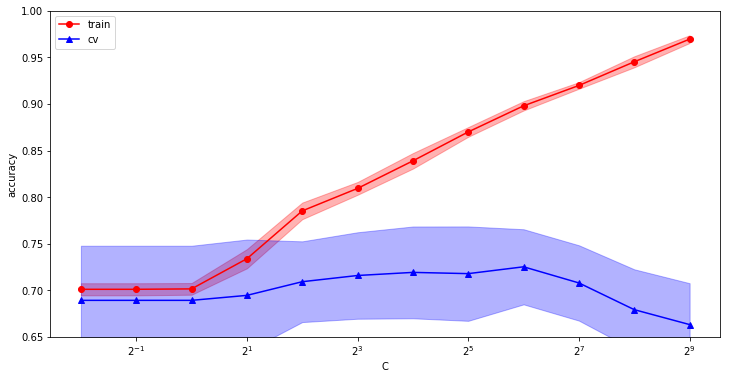

In [134]:
xs = np.array(svc_grid.cv_results_['param_C'], dtype=float)

t1 = svc_grid.cv_results_['mean_train_score']
t2 = svc_grid.cv_results_['mean_test_score']
t1_sd = svc_grid.cv_results_['std_train_score']
t2_sd = svc_grid.cv_results_['std_test_score']

plt.figure(figsize=(12, 6))
plt.plot(xs, t1, 'ro-', label='train')
plt.plot(xs, t2, 'b^-', label='cv')
plt.fill_between(xs, t1-t1_sd, t1+t1_sd, alpha=.3, color='r')
plt.fill_between(xs, t2-t2_sd, t2+t2_sd, alpha=.3, color='b')
plt.legend()
plt.semilogx(basex=2)
plt.ylabel('accuracy')
plt.xlabel('C')
plt.ylim(.65, 1.0)

In [146]:
a = list(range(len(X)))
b = np.random.choice(a, size=len(X), replace=True)

c = list(set(a) - set(b))

len(c) / len(a)

0.376

In [166]:
lr_params = {'C': 2**np.arange(-3, 2, .3)}
lr_grid = GridSearchCV(LogisticRegression(), lr_params, cv=cv, n_jobs=-1, verbose=1)

In [167]:
lr_grid.fit(X_train, y_train)

Fitting 10 folds for each of 17 candidates, totalling 170 fits


[Parallel(n_jobs=-1)]: Done 170 out of 170 | elapsed:    0.8s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=False),
       error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': array([ 0.125  ,  0.15389,  0.18946,  0.23326,  0.28717,  0.35355,
        0.43528,  0.53589,  0.65975,  0.81225,  1.     ,  1.23114,
        1.51572,  1.86607,  2.2974 ,  2.82843,  3.4822 ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [168]:
lr_grid.best_params_, lr_grid.best_score_

({'C': 0.99999999999999878}, 0.72799999999999998)

In [169]:
pd.DataFrame(lr_grid.cv_results_)

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split7_test_score,split7_train_score,split8_test_score,split8_train_score,split9_test_score,split9_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.008934,0.004484,0.721333,0.749768,0.125,{'C': 0.125},8,0.723684,0.744807,0.710526,...,0.702703,0.763314,0.743243,0.755917,0.716216,0.745562,0.004978,0.004907,0.040348,0.009359
1,0.005863,0.000655,0.725333,0.751846,0.153893,{'C': 0.153893051668},3,0.723684,0.740356,0.736842,...,0.702703,0.760355,0.743243,0.757396,0.729730,0.747041,0.000162,0.000045,0.048277,0.007344
2,0.012967,0.000958,0.726667,0.752884,0.189465,{'C': 0.189464570814},2,0.723684,0.747774,0.723684,...,0.702703,0.758876,0.729730,0.755917,0.729730,0.750000,0.008333,0.000701,0.044361,0.005367
3,0.010789,0.001703,0.722667,0.754367,0.233258,{'C': 0.233258247884},6,0.710526,0.749258,0.736842,...,0.689189,0.761834,0.716216,0.754438,0.729730,0.752959,0.004534,0.001309,0.049697,0.006007
4,0.015906,0.004604,0.720000,0.758368,0.287175,{'C': 0.287174588749},15,0.710526,0.756677,0.736842,...,0.675676,0.766272,0.716216,0.761834,0.729730,0.751479,0.010617,0.006863,0.048576,0.006106
5,0.010681,0.001579,0.721333,0.760146,0.353553,{'C': 0.353553390593},8,0.710526,0.761128,0.736842,...,0.689189,0.764793,0.702703,0.758876,0.729730,0.757396,0.002899,0.001643,0.045470,0.005197
6,0.017797,0.000548,0.721333,0.761922,0.435275,{'C': 0.435275281648},8,0.697368,0.764095,0.736842,...,0.675676,0.770710,0.702703,0.755917,0.729730,0.763314,0.009315,0.000122,0.053495,0.008318
7,0.009871,0.001909,0.720000,0.763700,0.535887,{'C': 0.535886731268},15,0.697368,0.767062,0.736842,...,0.675676,0.772189,0.689189,0.758876,0.729730,0.764793,0.005395,0.003739,0.056159,0.007127
8,0.013532,0.000652,0.720000,0.766220,0.659754,{'C': 0.659753955386},15,0.684211,0.768546,0.736842,...,0.675676,0.773669,0.702703,0.763314,0.743243,0.766272,0.005889,0.000035,0.056600,0.006018
9,0.008056,0.000842,0.724000,0.767702,0.812252,{'C': 0.812252396356},4,0.684211,0.770030,0.763158,...,0.689189,0.772189,0.689189,0.764793,0.756757,0.766272,0.001985,0.000741,0.058237,0.005799


(0.65, 1.0)

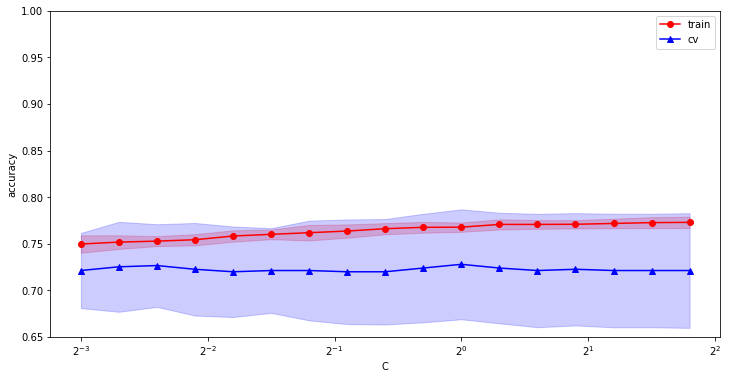

In [173]:
xs = np.array(lr_grid.cv_results_['param_C'], dtype=float)
t1 = lr_grid.cv_results_['mean_train_score']
t2 = lr_grid.cv_results_['mean_test_score']
t1_sd = lr_grid.cv_results_['std_train_score']
t2_sd = lr_grid.cv_results_['std_test_score']

plt.figure(figsize=(12, 6))
plt.plot(xs, t1, 'ro-', label='train')
plt.plot(xs, t2, 'b^-', label='cv')
plt.fill_between(xs, t1-t1_sd, t1+t1_sd, alpha=.2, color='r')
plt.fill_between(xs, t2-t2_sd, t2+t2_sd, alpha=.2, color='b')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.legend()
plt.semilogx(basex=2)
plt.ylim(.65, 1.0)

In [174]:
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel

In [212]:
df = pd.DataFrame(svc_grid.cv_results_)

col_mask = df.columns[df.columns.str.contains('split[0-9]+_test')].sort_values()

row_mask = df.param_C == svc_grid.best_params_['C']

svm_train = df.loc[row_mask, col_mask ].values.ravel()

In [213]:
df = pd.DataFrame(lr_grid.cv_results_)

col_mask = df.columns[df.columns.str.contains('split[0-9]+_test')]
row_mask = df.param_C == lr_grid.best_params_['C']

lr_train = df.loc[row_mask, col_mask].values.ravel()

In [214]:
ttest_ind(svm_train, lr_train, equal_var=False)

Ttest_indResult(statistic=0.61492862498326051, pvalue=0.54719393879203615)

In [216]:
cross_val_score(svc_grid.best_estimator_, X_train, y_train, cv=cv)

array([ 0.72368421,  0.73684211,  0.85526316,  0.72368421,  0.73684211,
        0.72972973,  0.71621622,  0.72972973,  0.7027027 ,  0.77027027])

In [217]:
svm_train

array([ 0.72368421,  0.73684211,  0.85526316,  0.72368421,  0.73684211,
        0.72972973,  0.71621622,  0.72972973,  0.7027027 ,  0.77027027])

In [218]:
cross_val_score(lr_grid.best_estimator_, X_train, y_train, cv=cv)

array([ 0.69736842,  0.76315789,  0.85526316,  0.63157895,  0.76315789,
        0.71621622,  0.7027027 ,  0.68918919,  0.68918919,  0.77027027])

In [219]:
lr_train

array([ 0.69736842,  0.76315789,  0.85526316,  0.63157895,  0.76315789,
        0.71621622,  0.7027027 ,  0.68918919,  0.68918919,  0.77027027])

In [268]:
svc_pipe = make_pipeline(StandardScaler(), SVC(kernel='rbf', gamma=.03))
svc_pipe_params = {'svc__C': 2**np.arange(-2, 8, dtype=float)}#, 'svc__gamma': 2**np.arange(-6, 1, .5)}
svc_pipe_grid = GridSearchCV(svc_pipe, svc_pipe_params, cv=cv, n_jobs=-1, verbose=1)

In [269]:
svc_pipe_grid.fit(X_train, y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Done  76 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    3.7s finished


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=123, shuffle=False),
       error_score='raise',
       estimator=Pipeline(steps=[('standardscaler', StandardScaler(copy=True, with_mean=True, with_std=True)), ('svc', SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.03, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False))]),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'svc__C': array([   0.25,    0.5 ,    1.  ,    2.  ,    4.  ,    8.  ,   16.  ,
         32.  ,   64.  ,  128.  ])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=1)

In [270]:
svc_pipe_grid.best_score_, svc_pipe_grid.best_params_

(0.73999999999999999, {'svc__C': 2.0})

In [271]:
df = pd.DataFrame(svc_pipe_grid.cv_results_)

[]

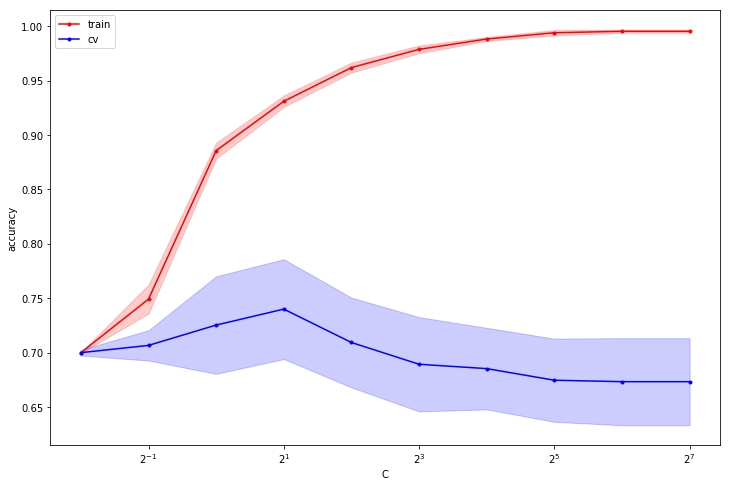

In [272]:
t1 = df['mean_train_score'].values
t2 = df['mean_test_score'].values
xs = np.array(df['param_svc__C'], dtype=float)

t1_sd = df['std_train_score'].values
t2_sd = df['std_test_score'].values

plt.figure(figsize=(12, 8))
plt.plot(xs, t1, 'r.-', label='train')
plt.plot(xs, t2, 'b.-', label='cv')
plt.fill_between(xs, t1-t1_sd, t1+t1_sd, alpha=.2, color='r')
plt.fill_between(xs, t2-t2_sd, t2+t2_sd, alpha=.2, color='b')
plt.ylabel('accuracy')
plt.xlabel('C')
plt.legend()
plt.semilogx(basex=2)

In [273]:
svc_pipe_scores = cross_val_score(svc_pipe_grid.best_estimator_, X_train, y_train, cv=cv)

In [274]:
ttest_ind(svc_pipe_scores, svm_train, equal_var=False)

Ttest_indResult(statistic=-0.1232729510296634, pvalue=0.90327248990685949)

In [276]:
lr_scores = cross_val_score(make_pipeline(StandardScaler(), LogisticRegression()), X_train, y_train, cv=cv)

In [277]:
ttest_ind(svc_pipe_scores, lr_scores, equal_var=False)

Ttest_indResult(statistic=0.60462127907202179, pvalue=0.55336482930630415)

In [278]:
lr_scores.mean(), lr_scores.std()

(0.72514224751066858, 0.057656640167599311)

In [279]:
svc_pipe_scores.mean(), svc_pipe_scores.std()

(0.73997155049786634, 0.045713213416430004)

In [4]:
permeability = pd.read_csv('datasets/permeability/permeability.csv', index_col=0)
fingerprints = pd.read_csv('datasets/permeability/fingerprints.csv', index_col=0)

In [5]:
permeability.head()

,permeability
1,12.520
2,1.120
3,19.405
4,1.730
5,1.680


In [6]:
fingerprints.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X1098,X1099,X1100,X1101,X1102,X1103,X1104,X1105,X1106,X1107
1,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
permeability.shape, fingerprints.shape

((165, 1), (165, 1107))

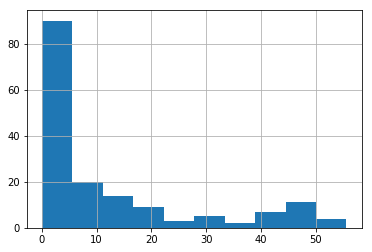

In [8]:
permeability.permeability.hist()

In [9]:
re_cv = RepeatedKFold(n_splits=10, n_repeats=25)

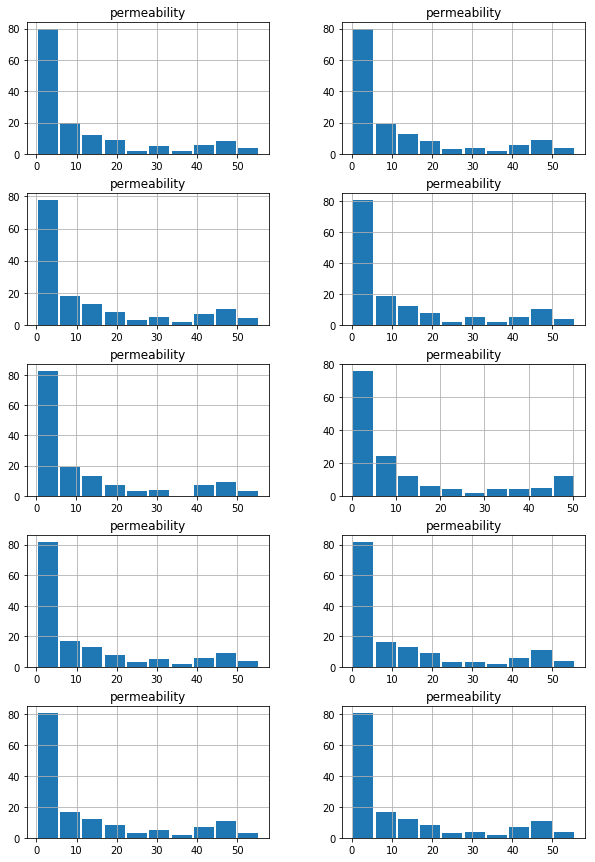

In [13]:
fig, ax = plt.subplots(ncols=2, nrows=5, figsize=(10, 15))
for axi, (idx1, idx2) in zip(ax.flat, re_cv.split(permeability)):
    permeability.iloc[idx1, :].hist(ax=axi, rwidth=.9)

In [16]:
chem = pd.read_csv('data/ChemicalManufacturingProcess/ChemicalManufacturingProcess.csv', index_col=0)

In [17]:
chem.head()

,Yield,BiologicalMaterial01,BiologicalMaterial02,BiologicalMaterial03,BiologicalMaterial04,BiologicalMaterial05,BiologicalMaterial06,BiologicalMaterial07,BiologicalMaterial08,BiologicalMaterial09,...,ManufacturingProcess36,ManufacturingProcess37,ManufacturingProcess38,ManufacturingProcess39,ManufacturingProcess40,ManufacturingProcess41,ManufacturingProcess42,ManufacturingProcess43,ManufacturingProcess44,ManufacturingProcess45
1,38.00,6.25,49.58,56.97,12.74,19.51,43.73,100.0,16.66,11.44,...,0.019,0.5,3.0,7.2,NaN,NaN,11.6,3.0,1.8,2.4
2,42.44,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.019,2.0,2.0,7.2,0.1,0.15,11.1,0.9,1.9,2.2
3,42.03,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,0.7,2.0,7.2,0.0,0.00,12.0,1.0,1.8,2.3
4,41.42,8.01,60.97,67.48,14.65,19.36,53.14,100.0,19.04,12.55,...,0.018,1.2,2.0,7.2,0.0,0.00,10.6,1.1,1.8,2.1
5,42.49,7.47,63.33,72.25,14.02,17.91,54.66,100.0,18.22,12.80,...,0.017,0.2,2.0,7.3,0.0,0.00,11.0,1.1,1.7,2.1


In [18]:
chem.shape

(176, 58)

In [20]:
chem.columns[chem.columns.str.contains('Material')]

Index(['BiologicalMaterial01', 'BiologicalMaterial02', 'BiologicalMaterial03',
       'BiologicalMaterial04', 'BiologicalMaterial05', 'BiologicalMaterial06',
       'BiologicalMaterial07', 'BiologicalMaterial08', 'BiologicalMaterial09',
       'BiologicalMaterial10', 'BiologicalMaterial11', 'BiologicalMaterial12'],
      dtype='object')

In [21]:
chem.columns[chem.columns.str.contains('Process')]

Index(['ManufacturingProcess01', 'ManufacturingProcess02',
       'ManufacturingProcess03', 'ManufacturingProcess04',
       'ManufacturingProcess05', 'ManufacturingProcess06',
       'ManufacturingProcess07', 'ManufacturingProcess08',
       'ManufacturingProcess09', 'ManufacturingProcess10',
       'ManufacturingProcess11', 'ManufacturingProcess12',
       'ManufacturingProcess13', 'ManufacturingProcess14',
       'ManufacturingProcess15', 'ManufacturingProcess16',
       'ManufacturingProcess17', 'ManufacturingProcess18',
       'ManufacturingProcess19', 'ManufacturingProcess20',
       'ManufacturingProcess21', 'ManufacturingProcess22',
       'ManufacturingProcess23', 'ManufacturingProcess24',
       'ManufacturingProcess25', 'ManufacturingProcess26',
       'ManufacturingProcess27', 'ManufacturingProcess28',
       'ManufacturingProcess29', 'ManufacturingProcess30',
       'ManufacturingProcess31', 'ManufacturingProcess32',
       'ManufacturingProcess33', 'ManufacturingProcess34

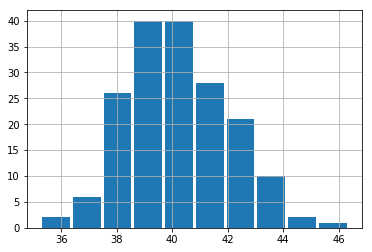

In [23]:
chem.Yield.hist(rwidth=.9)

In [24]:
from sklearn.cross_decomposition import PLSRegression

In [32]:
chem = chem.dropna()

In [34]:
X = chem.drop('Yield', axis=1).values
Y = chem['Yield'].values

In [48]:
cv = RepeatedKFold(n_repeats=5, n_splits=10, random_state=123)

In [49]:
for n in range(1, 11):
    scores = cross_val_score(PLSRegression(n_components=n, scale=True), X, Y, cv=cv, scoring='r2')
    print("n={:2d}, mean: {:.3f}, std: {:.4f}".format(n, scores.mean(), scores.std()))

n= 1, mean: 0.307, std: 0.3100
n= 2, mean: 0.311, std: 0.4744
n= 3, mean: -0.039, std: 1.6105
n= 4, mean: -0.476, std: 2.8750
n= 5, mean: -1.460, std: 5.9153
n= 6, mean: -1.986, std: 7.7268
n= 7, mean: -2.531, std: 9.6775
n= 8, mean: -2.473, std: 10.3118
n= 9, mean: -2.464, std: 10.6365
n=10, mean: -3.220, std: 14.8481


In [35]:
pls.fit(X, Y)

PLSRegression(copy=True, max_iter=500, n_components=2, scale=True, tol=1e-06)

In [38]:
pls.score(X, Y)

0.62425317032363026

In [44]:
scores

array([  8.86103887e-02,   5.86990717e-01,  -1.31801470e+01,
         6.84526881e-01,   5.22996244e-01,   1.31865204e-02,
         6.30546793e-01,   2.73767211e-01,   2.39955645e-01,
         6.20867383e-01,   8.11550702e-01,   4.85031108e-01,
        -9.90897192e+00,   5.08350367e-01,  -1.18441751e-01,
        -1.61691833e-01,   6.49064903e-01,   6.42438704e-01,
         3.30752662e-01,   6.47810782e-01,   5.66095222e-01,
        -6.86953169e-01,   5.52728181e-01,   4.65949693e-01,
         2.48022945e-01,   6.05276380e-01,   5.37247107e-01,
        -2.86887649e+01,   5.55621463e-01,   3.48707897e-01,
         6.92733275e-01,   4.45644102e-01,  -6.51698898e-01,
        -3.88994302e-01,  -2.80504966e+01,   4.80707785e-01,
         6.48301150e-01,   3.21210802e-01,   5.89410936e-01,
         7.10022297e-01,   2.10369557e-01,   3.93589215e-01,
         6.21326299e-01,  -1.80200960e-02,  -9.82247402e+01,
         5.58623079e-01,   3.08020540e-01,   2.06692253e-01,
         5.84304941e-01,

In [52]:
oil = pd.read_csv('data/oil/oilType.csv', index_col=0)

In [70]:
(pd.value_counts(oil.values.ravel()) / len(oil)).sort_index()

A    0.385417
B    0.270833
C    0.031250
D    0.072917
E    0.114583
F    0.104167
G    0.020833
dtype: float64

In [87]:
df = pd.DataFrame(index="A B C D E F G".split())
for i in range(20):
    a = np.random.choice(oil.values.ravel(), size=60, replace=True)
    df["n_"+ str(i)] = pd.value_counts(a)

df.fillna(0, inplace=True)

In [88]:
df.mean(axis=1) / 60

A    0.400000
B    0.263333
C    0.033333
D    0.063333
E    0.110000
F    0.104167
G    0.025833
dtype: float64